In [3]:
#展示container的cpu使用率
import pandas as pd
meta = pd.read_csv('../srcData/aliData/container_meta.csv',header=None, names=['container_id', 'machine_id', 'time_stamp','app_id', 'status', 'cpu_request', 'cpu_limit','mem_size'])
print(meta)

       container_id machine_id  time_stamp    app_id   status  cpu_request  \
0               c_1     m_2556           0  app_5052  started        400.0   
1               c_1     m_2556      287942  app_5052  started        400.0   
2               c_1     m_2556      338909  app_5052  started        400.0   
3               c_2      m_962           0  app_8125  started        800.0   
4               c_2      m_962       23205  app_8125  started        800.0   
...             ...        ...         ...       ...      ...          ...   
109963      c_21224     m_2072           0  app_3288  started        800.0   
109964      c_21224     m_2072       13168  app_3288  started        800.0   
109965      c_21224     m_2072      108476  app_3288  started        800.0   
109966      c_21224     m_2072      177760  app_3288  started        800.0   
109967      c_21224     m_2072      260292  app_3288  started          NaN   

        cpu_limit  mem_size  
0           400.0      1.56  
1  

In [4]:
meta = meta[meta['status']=='started'][['container_id','app_id','cpu_request']]
print(meta)

       container_id    app_id  cpu_request
0               c_1  app_5052        400.0
1               c_1  app_5052        400.0
2               c_1  app_5052        400.0
3               c_2  app_8125        800.0
4               c_2  app_8125        800.0
...             ...       ...          ...
109963      c_21224  app_3288        800.0
109964      c_21224  app_3288        800.0
109965      c_21224  app_3288        800.0
109966      c_21224  app_3288        800.0
109967      c_21224  app_3288          NaN

[109293 rows x 3 columns]


In [5]:
meta.dropna(subset=['cpu_request'], inplace=True)
print(meta)

       container_id    app_id  cpu_request
0               c_1  app_5052        400.0
1               c_1  app_5052        400.0
2               c_1  app_5052        400.0
3               c_2  app_8125        800.0
4               c_2  app_8125        800.0
...             ...       ...          ...
109962      c_21223  app_3514        400.0
109963      c_21224  app_3288        800.0
109964      c_21224  app_3288        800.0
109965      c_21224  app_3288        800.0
109966      c_21224  app_3288        800.0

[109292 rows x 3 columns]


In [6]:
meta.drop_duplicates(subset=['container_id','app_id'], keep='first',inplace=True)
print(meta)

       container_id    app_id  cpu_request
0               c_1  app_5052        400.0
3               c_2  app_8125        800.0
8               c_3    app_66        400.0
13              c_4  app_3222        400.0
20              c_5  app_5955        400.0
...             ...       ...          ...
109940      c_21219  app_3387        400.0
109953      c_21221  app_4799        800.0
109956      c_21222  app_7604        400.0
109959      c_21223  app_3514        400.0
109963      c_21224  app_3288        800.0

[21103 rows x 3 columns]


In [7]:
meta.sort_values(by='app_id', ascending=True,inplace=True)
print(meta,meta['cpu_request'].max())

       container_id   app_id  cpu_request
81915       c_15794    app_1        400.0
80794       c_15576   app_10        800.0
101468      c_19567   app_10        800.0
715           c_136   app_10        800.0
50868        c_9842   app_10        800.0
...             ...      ...          ...
60152       c_11606  app_997        400.0
109811      c_21194  app_997        400.0
65555       c_12641  app_998        400.0
26474        c_5101  app_998        400.0
28018        c_5402  app_998        400.0

[21103 rows x 3 columns] 3200.0


In [8]:
import csv
import numpy as np
def run(filename,cpu_request):
    chunk = pd.read_csv('../srcData/aliData/' + str(filename) + '.txt',header=None, sep='\t', encoding="utf-8", quoting=csv.QUOTE_NONE, escapechar=',',names=['time_stamp', 'cpu_util_percent', 'mem_util_percent'])
    if chunk['cpu_util_percent'].sum() < 150000:
        return
    min_time = chunk['time_stamp'].min()
    chunk['time_stamp'] = chunk['time_stamp'] - min_time
    assistance = np.array([i*10 for i in range(69120)])
    assistance = pd.DataFrame(assistance, columns=['time_stamp'])
    chunk = pd.concat([chunk, assistance])
    chunk.drop_duplicates(subset=['time_stamp'], keep='first',inplace=True)
    chunk.sort_values(by='time_stamp', ascending=True,inplace=True)
    chunk['cpu_util_percent'].interpolate(method='linear', inplace=True)
    chunk['mem_util_percent'].interpolate(method='linear', inplace=True)
    chunk['cpu_util_percent'] = chunk['cpu_util_percent'] * cpu_request / 10000
    chunk['time_stamp'] /= 86400
    return chunk
chunk = run('c_21194',400)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

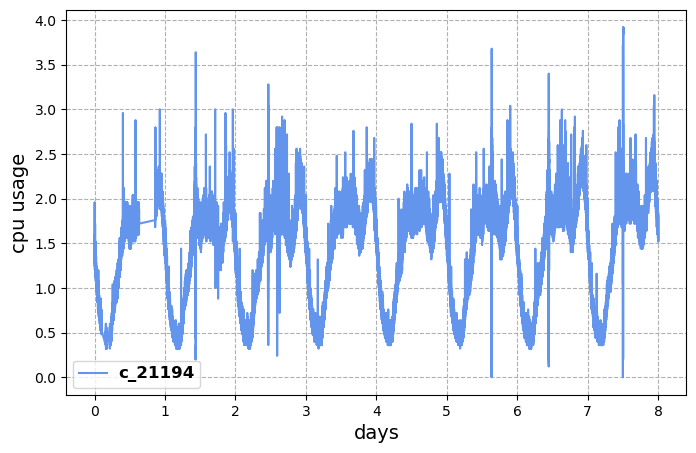

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体，则在此处设为：SimHei
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
plt.figure(figsize=(8, 5))
plt.grid(linestyle="--") # 设置背景网格线为虚线
ax = plt.gca()
plt.plot(chunk['time_stamp'],chunk['cpu_util_percent'],color="CornflowerBlue",label="c_21194",linewidth=1.5)
plt.xlabel('days',fontsize=14)
plt.ylabel('cpu usage', fontsize=14)
plt.legend()          #显示各曲线的图例
plt.legend(loc=3,numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext,fontsize=12,fontweight='bold')
plt.show()